### Case Study : IPL
#### -----------------------------------------------------------------------------------------------------------------------------------------####
- Bowler with maximum Wickets
- Record of Each Bowler
- Record Of Score Made By Each Player
- Maximum 4's
- Maximum 6's

In [1]:
## importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ball_data = pd.read_csv(r"C:\Users\dell\Itronix\Datasets\Ball_by_Ball.csv")
match_data = pd.read_csv(r"C:\Users\dell\Itronix\Datasets\Match.csv")
player_data = pd.read_csv(r"C:\Users\dell\Itronix\Datasets\Player.csv")
player_match_data = pd.read_csv(r"C:\Users\dell\Itronix\Datasets\Player_Match.csv")
season_data = pd.read_csv(r"C:\Users\dell\Itronix\Datasets\Season.csv")
team_data = pd.read_csv(r"C:\Users\dell\Itronix\Datasets\Team.csv")

In [4]:
ball_data.head(n=3)

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,3,1,2,2,2,1,14,0,wides,1,,,


In [5]:
match_data.head(n=3)

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India


In [6]:
player_data.head(n=3)

,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
0,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India,0,NaN
1,2,BB McCullum,27-Sep-81,Right_Hand,Right-arm medium,New Zealand,0,NaN
2,3,RT Ponting,19-Dec-74,Right_Hand,Right-arm medium,Australia,0,NaN


In [8]:
player_match_data.head(n=3)

,Match_Id,Player_Id,Team_Id,Is_Keeper,Is_Captain
0,335987,1,1,0,1
1,335987,2,1,0,0
2,335987,3,1,0,0


In [9]:
season_data.head(n=5)

,Season_Id,Season_Year,Orange_Cap_Id,Purple_Cap_Id,Man_of_the_Series_Id
0,1,2008,100,102,32
1,2,2009,18,61,53
2,3,2010,133,131,133
3,4,2011,162,194,162
4,5,2012,162,190,315


In [10]:
team_data.head(n=5)

,Team_Id,Team_Name,Team_Short_Code
0,1,Kolkata Knight Riders,KKR
1,2,Royal Challengers Bangalore,RCB
2,3,Chennai Super Kings,CSK
3,4,Kings XI Punjab,KXIP
4,5,Rajasthan Royals,RR


## Counting and Removing Null Rows

In [207]:
print(round(ball_data.isnull().sum() *100/len(ball_data)))

Match_Id                    0.0
Innings_Id                  0.0
Over_Id                     0.0
Ball_Id                     0.0
Team_Batting_Id             0.0
Team_Bowling_Id             0.0
Striker_Id                  0.0
Striker_Batting_Position    0.0
Non_Striker_Id              0.0
Bowler_Id                   0.0
Batsman_Scored              0.0
Extra_Type                  0.0
Extra_Runs                  0.0
Player_dissimal_Id          0.0
Dissimal_Type               0.0
Fielder_Id                  0.0
dtype: float64


In [12]:
print(round(season_data.isnull().sum() *100/len(season_data),2))

Season_Id               0.0
Season_Year             0.0
Orange_Cap_Id           0.0
Purple_Cap_Id           0.0
Man_of_the_Series_Id    0.0
dtype: float64


In [13]:
print(round(match_data.isnull().sum() *100/len(match_data),2))

Match_Id               0.00
Match_Date             0.00
Team_Name_Id           0.00
Opponent_Team_Id       0.00
Season_Id              0.00
Venue_Name             0.00
Toss_Winner_Id         0.00
Toss_Decision          0.00
IS_Superover           0.00
IS_Result              0.00
Is_DuckWorthLewis      0.00
Win_Type               0.00
Won_By                 1.56
Match_Winner_Id        0.52
Man_Of_The_Match_Id    0.52
First_Umpire_Id        0.00
Second_Umpire_Id       0.00
City_Name              0.00
Host_Country           0.00
dtype: float64


In [14]:
print(round(player_data.isnull().sum() *100/len(player_data),2))

Player_Id         0.00
Player_Name       0.00
DOB               9.94
Batting_Hand      9.94
Bowling_Skill    18.36
Country           0.00
Is_Umpire         0.00
Unnamed: 7       97.71
dtype: float64


In [15]:
print(round(player_match_data.isnull().sum() *100/len(player_match_data),2))

Match_Id      0.0
Player_Id     0.0
Team_Id       0.0
Is_Keeper     0.0
Is_Captain    0.0
dtype: float64


## Finding Maximum Wickets and Printing Wickets OF each Player

In [166]:
temp = ball_data[(ball_data[ "Dissimal_Type" ] != "run out") & (ball_data[ "Dissimal_Type" ] != "retired hurt") & (ball_data[ "Dissimal_Type" ] != " ") ]
print(type(temp))

<class 'pandas.core.frame.DataFrame'>


In [167]:
temp.head(n=3)

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
33,335987,1,6,2,1,2,1,1,2,15,0,,,1,caught,9
74,335987,1,13,1,1,2,3,3,2,9,0,,,3,caught,14
106,335987,1,18,1,1,2,4,4,2,13,0,,,4,caught,10


In [172]:
temp.get_group(1)

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
174,335987,2,8,5,2,1,11,6,10,1,0,,,11,caught,83
210,335987,2,14,1,2,1,15,10,14,1,0,,,15,bowled,
6768,336015,2,10,1,2,1,6,4,11,1,0,,,6,bowled,
7680,336019,2,9,1,8,1,58,4,57,1,0,,,58,caught,63
7719,336019,2,15,4,8,1,59,7,54,1,0,,,59,caught,128
10527,336032,2,10,5,5,1,32,4,33,1,0,,,32,bowled,
14516,392191,1,7,2,4,1,29,3,161,1,0,,,29,caught,83
14518,392191,1,7,4,4,1,161,1,26,1,0,,,161,caught,2


In [153]:
d = {}
def find_wickets(temp):
    for name,group in temp:
        print("Wicket taken by ",player_data[player_data["Player_Id"] == name]["Player_Name"].iloc[0]," :",len(group))
        d[player_data[player_data["Player_Id"] == name]["Player_Name"].iloc[0]] = [len(group)]
    name = list(d.keys())
    w = np.array(list(d.values()))
    w = w.reshape((len(w),))
    i = np.argmax(w)
    print()
    print("===============================================================================")
    print("Maximum Wickets by ",name[i]," :",w[i])
    

In [154]:
find_wickets(temp)

Wicket taken by  SC Ganguly  : 8
Wicket taken by  DJ Hussey  : 5
Wicket taken by  Mohammad Hafeez  : 2
Wicket taken by  V Kohli  : 4
Wicket taken by  JH Kallis  : 44
Wicket taken by  CL White  : 1
Wicket taken by  B Akhil  : 6
Wicket taken by  AA Noffke  : 1
Wicket taken by  P Kumar  : 68
Wicket taken by  Z Khan  : 75
Wicket taken by  SB Joshi  : 1
Wicket taken by  SK Raina  : 22
Wicket taken by  JDP Oram  : 9
Wicket taken by  JR Hopes  : 14
Wicket taken by  Yuvraj Singh  : 30
Wicket taken by  IK Pathan  : 69
Wicket taken by  YK Pathan  : 36
Wicket taken by  SR Watson  : 73
Wicket taken by  RA Jadeja  : 59
Wicket taken by  D Salunkhe  : 1
Wicket taken by  SK Warne  : 57
Wicket taken by  SK Trivedi  : 46
Wicket taken by  V Sehwag  : 6
Wicket taken by  S Dhawan  : 1
Wicket taken by  ST Jayasuriya  : 13
Wicket taken by  DJ Thornely  : 3
Wicket taken by  AM Nayar  : 8
Wicket taken by  SM Pollock  : 11
Wicket taken by  Harbhajan Singh  : 107
Wicket taken by  AC Gilchrist  : 1
Wicket taken b

### Record Of Score Made By Each Player

In [233]:
temp3 = player_data.rename(columns = {"Player_Id":"Striker_Id"})

In [234]:
temp3.head(n=3)

,Striker_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7
0,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India,0,NaN
1,2,BB McCullum,27-Sep-81,Right_Hand,Right-arm medium,New Zealand,0,NaN
2,3,RT Ponting,19-Dec-74,Right_Hand,Right-arm medium,Australia,0,NaN


In [235]:
ball_data = ball_data.replace('Do_nothing',0)
ball_data = ball_data.replace(' ',0)

batsman = ball_data.astype({"Batsman_Scored":int})
# batsman = batsman.groupby("Striker_Id")

In [390]:
temp2 = pd.merge(temp3,ball_data,on = "Striker_Id",how = "inner")

In [391]:
temp2 = temp2.astype({"Batsman_Scored":int})

In [392]:
temp2.head(n=3)

,Striker_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7,Match_Id,Innings_Id,...,Team_Bowling_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India,0,NaN,335987,1,...,2,1,2,14,0,legbyes,1,0,0,0
1,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India,0,NaN,335987,1,...,2,1,2,14,0,0,0,0,0,0
2,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India,0,NaN,335987,1,...,2,1,2,14,0,0,0,0,0,0


In [393]:
temp2 = temp2.groupby(["Striker_Id","Player_Name"],as_index = False)
# batsman = ball_data.astype({"Batsman_Scored":int})

#### Score Data of Each player

In [394]:
print("Score of Each Player is\n =====================================================================\n")
ds = temp2["Batsman_Scored"].agg((np.sum))
print(ds)

Score of Each Player is

     Striker_Id      Player_Name  Batsman_Scored
0             1       SC Ganguly            1349
1             2      BB McCullum            2435
2             3       RT Ponting              91
3             4        DJ Hussey            1322
4             5  Mohammad Hafeez              64
5             6         R Dravid            2170
6             7         W Jaffer             130
7             8          V Kohli            4105
8             9        JH Kallis            2427
9            10         CL White             971
10           11       MV Boucher             394
11           12          B Akhil              76
12           13        AA Noffke               9
13           14          P Kumar             332
14           15           Z Khan             113
15           16         SB Joshi               6
16           17         PA Patel            1927
17           18        ML Hayden            1107
18           19       MEK Hussey            

In [395]:
ds2 = pd.DataFrame(ds)

In [396]:
ds2.head(n=5)

,Striker_Id,Player_Name,Batsman_Scored
0,1,SC Ganguly,1349
1,2,BB McCullum,2435
2,3,RT Ponting,91
3,4,DJ Hussey,1322
4,5,Mohammad Hafeez,64


## Highest Score

In [397]:
print("Highest score :\n", ds2[ds2["Batsman_Scored"] == max(ds2["Batsman_Scored"])])

Highest score :
     Striker_Id Player_Name  Batsman_Scored
20          21    SK Raina            4106


### Maximum 4s and Number of 4s by each player

In [384]:
mdata = pd.merge(temp3,ball_data,on = "Striker_Id",how = "inner")
mdata = mdata.astype({"Batsman_Scored":int})
fours = mdata[mdata["Batsman_Scored"] == 4]


In [385]:
fours.head(n=3)

,Striker_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7,Match_Id,Innings_Id,...,Team_Bowling_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
5,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India,0,NaN,335987,1,...,2,1,2,13,4,0,0,0,0,0
8,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India,0,NaN,335987,1,...,2,1,2,14,4,0,0,0,0,0
36,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India,0,NaN,335991,2,...,8,4,4,59,4,0,0,0,0,0


In [386]:
fours = fours.groupby(["Striker_Id","Player_Name"], as_index = False)

In [387]:
fours = fours["Batsman_Scored"].agg(np.size)
print(fours)

     Striker_Id      Player_Name  Batsman_Scored
0             1       SC Ganguly             137
1             2      BB McCullum             248
2             3       RT Ponting               5
3             4        DJ Hussey              90
4             5  Mohammad Hafeez               7
5             6         R Dravid             268
6             7         W Jaffer              14
7             8          V Kohli             360
8             9        JH Kallis             255
9            10         CL White              76
10           11       MV Boucher              32
11           12          B Akhil               5
12           13        AA Noffke               1
13           14          P Kumar              22
14           15           Z Khan              11
15           17         PA Patel             248
16           18        ML Hayden             121
17           19       MEK Hussey             198
18           20         MS Dhoni             236
19           21     

In [388]:
fours = pd.DataFrame(fours)

### Most Number of 4s

In [389]:
print("Highest score :\n", fours[fours["Batsman_Scored"] == max(fours["Batsman_Scored"])])

Highest score :
     Striker_Id Player_Name  Batsman_Scored
37          40   G Gambhir             422


## Most number of 6 and number of 6

In [376]:
sixes = mdata[mdata["Batsman_Scored"] == 6]

In [377]:
sixes.head(n=3)

,Striker_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7,Match_Id,Innings_Id,...,Team_Bowling_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
90,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India,0,NaN,336005,2,...,5,2,4,39,6,0,0,0,0,0
98,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India,0,NaN,336005,2,...,5,2,4,126,6,0,0,0,0,0
186,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India,0,NaN,336019,1,...,8,2,4,131,6,0,0,0,0,0


In [378]:
sixes = sixes.groupby(["Striker_Id","Player_Name"] , as_index = False)

In [379]:
df = sixes["Batsman_Scored"].agg(np.size)

### 6s Scored by Each player

In [380]:
print("6 Score by Each player\n===================================================================")
print(df)

6 Score by Each player
     Striker_Id      Player_Name  Batsman_Scored
0             1       SC Ganguly              42
1             2      BB McCullum             106
2             3       RT Ponting               2
3             4        DJ Hussey              60
4             5  Mohammad Hafeez               2
5             6         R Dravid              28
6             7         W Jaffer               3
7             8          V Kohli             148
8             9        JH Kallis              44
9            10         CL White              38
10           11       MV Boucher              13
11           12          B Akhil               5
12           14          P Kumar              17
13           15           Z Khan               2
14           17         PA Patel              27
15           18        ML Hayden              44
16           19       MEK Hussey              52
17           20         MS Dhoni             140
18           21         SK Raina             1

## Maximum number of 6

In [381]:
df = pd.DataFrame(df)

In [382]:
df.head(n=3)

,Striker_Id,Player_Name,Batsman_Scored
0,1,SC Ganguly,42
1,2,BB McCullum,106
2,3,RT Ponting,2


In [383]:
print("Maximum Number of 6 are : \n",df[df["Batsman_Scored"] == max(df["Batsman_Scored"])])

Maximum Number of 6 are : 
      Striker_Id Player_Name  Batsman_Scored
121         162    CH Gayle             252


## Plotting

In [339]:
tf = mdata[mdata["Batsman_Scored"]==6]

In [340]:
tf.head(n=2)

,Striker_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country,Is_Umpire,Unnamed: 7,Match_Id,Innings_Id,...,Team_Bowling_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
90,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India,0,NaN,336005,2,...,5,2,4,39,6,0,0,0,0,0
98,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India,0,NaN,336005,2,...,5,2,4,126,6,0,0,0,0,0


In [343]:
tf = tf.groupby(["Striker_Id","Player_Name"] ,as_index=False)

In [364]:
dope = tf["Batsman_Scored"].agg(np.size)

In [365]:
print(dope.shape)
print(type(dope))

(281, 3)
<class 'pandas.core.frame.DataFrame'>


In [366]:
dope.head(n=5)

,Striker_Id,Player_Name,Batsman_Scored
0,1,SC Ganguly,42
1,2,BB McCullum,106
2,3,RT Ponting,2
3,4,DJ Hussey,60
4,5,Mohammad Hafeez,2


In [367]:
plt.style.use("seaborn")

## Bar Graph of top 10 scorers of 6

In [369]:
dope = dope.sort_values(by=["Batsman_Scored"],ascending=False)
dope.head(n=5)

,Striker_Id,Player_Name,Batsman_Scored
121,162,CH Gayle,252
51,57,RG Sharma,164
18,21,SK Raina,161
7,8,V Kohli,148
28,31,YK Pathan,143


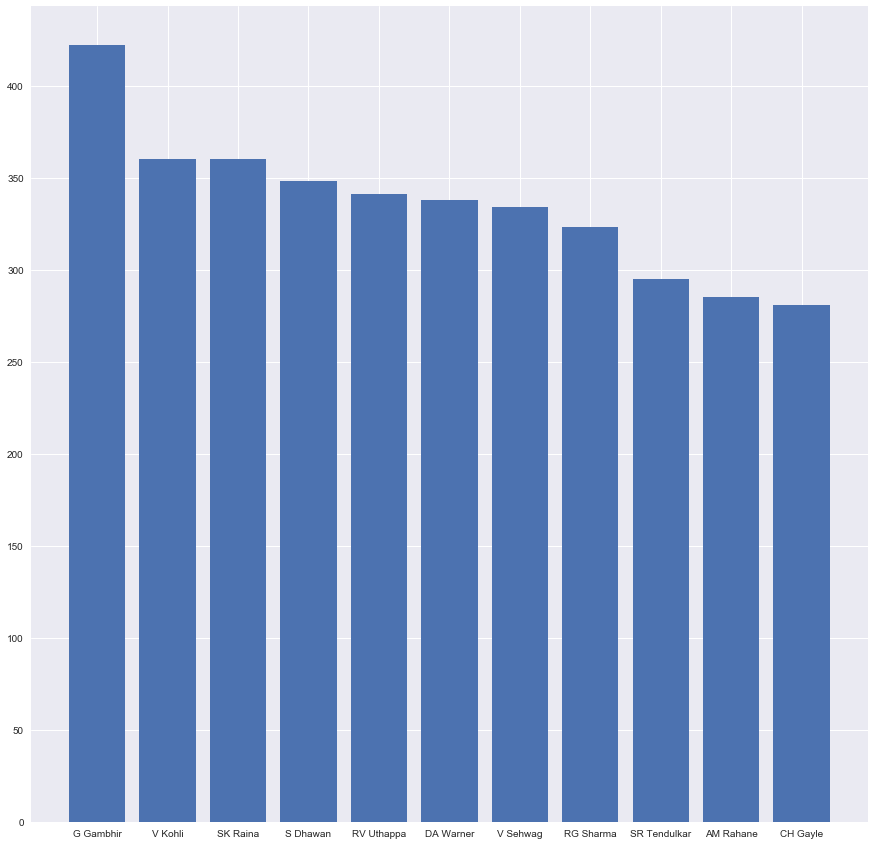

In [374]:
plt.figure(figsize=(15,15))
plt.bar(dope["Player_Name"].iloc[:11],dope["Batsman_Scored"].iloc[:11])
plt.show()

## Graph of top 10 players with maximum 4s

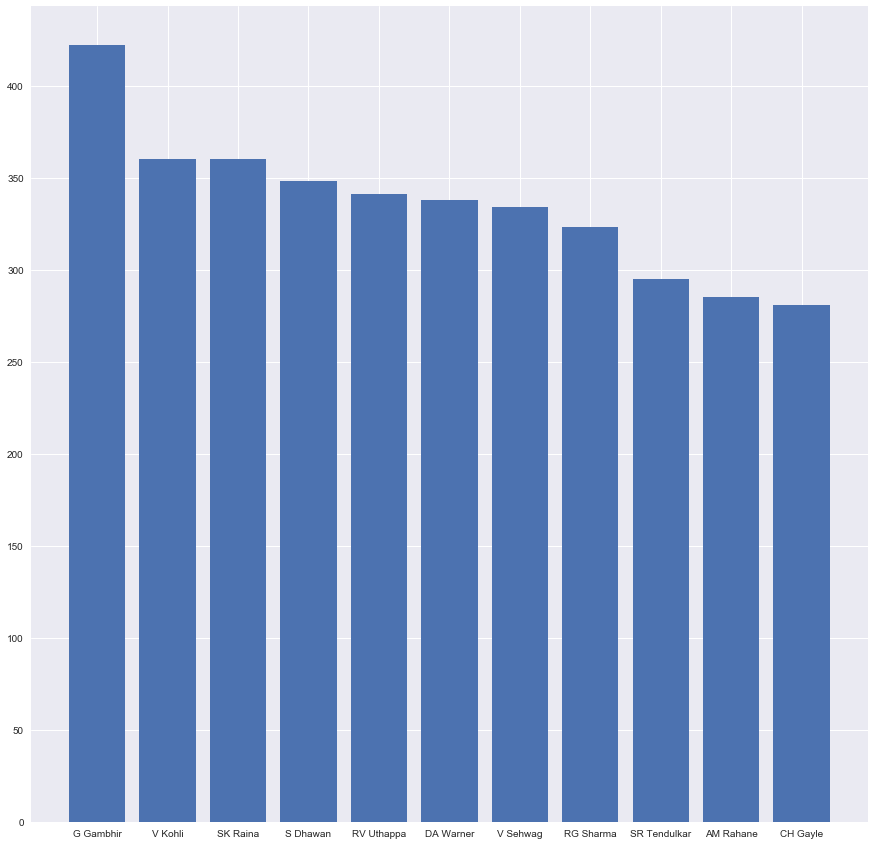

In [373]:
tf = mdata[mdata["Batsman_Scored"]==4]
tf = tf.groupby(["Striker_Id","Player_Name"] ,as_index=False)
dope = tf["Batsman_Scored"].agg(np.size)
plt.style.use("seaborn")
dope = dope.sort_values(by=["Batsman_Scored"],ascending=False)
plt.figure(figsize=(15,15))
plt.bar(dope["Player_Name"].iloc[:11],dope["Batsman_Scored"].iloc[:11])
plt.show()